<h1>Introduction</h1>
<h2>1. Domain Specific Area</h2>
This project seeks to quantify the margin opportunity for prospect Airbnb hosts who wish to have a property as an income source.
Airbnb has been around for more than 10 years (it was founded in 2008). For many people represents an opportunity to turn their properties into a source of income as short-term rentals.
Historically, short-terms rentals were managed by real estate agencies, but through Airbnb property-owners are able to have direct contact with prospect customers who rent a property through the platform.
It is difficult however to estimate how much income an owner could derive from a property given different variables that have direct impact on the likelihood of a property to be successful and have a high occupancy rate.
One of the main features at the time of choosing a rental is the description that hosts include to "sell" the attractiveness of the property, highlighting the main advantages it has.
There are existing solutions that aim to assess this yield opportunity such as <a href="https://www.nestify.co.uk/">Nestify</a> and <a href="https://www.houst.com/">Houst</a>.
There are several examples of how Airbnb *reviews* can influence prospects for getting more clients in a rental. Typically this would be done by doing a sentiment analysis such as this <a href="https://medium.com/@yogi.sarumaha/airbnb-sentiment-analysis-with-python-e81e66fee6a6">example</a>. Instead of customer-side reviews, I decided to focus on host-side inputs to conduct a more novel analysis, as I am sure most of my fellow students will focus the former instead of the latter.

Additionally, my aim is to bring in the text mining element to these numerical approaches, proving the impact of how a good description can boost the rental value.

There is a final challenge I wanted to take on with this project which is attempting to work with unstructured language data, because I consider that it is more realistic with professional projects.

<h2>2. Objectives</h2>
The main goal for this project is to show the impact that a property description on Airbnb can have in boosting the chances of a property to be chosen and thus have a higher yield or margin through a high occupancy rate.

* what are the main factors that influence Airbnb renting price?
* how well can we predict the Airbnb renting yield?

Ultimately I would like to explore how text-mining based features can help improve a model's performance.

<h3>2.1 Project Plan</h3>
Here's a brief overview of my project plan to achieve the stated objectives:</br>

<li>1) Scrap datasets from Airbnb's API</li>
<li>2) Perform an initial Exploratory Data Analysis</li>
<li>3) Clean data, including removing outliers and missing values</li>
<li>4) Feature engineering for detecting best features for the model</li>
<li>5) Topic modelling, apply text-mining techniques to process unstructured data</li>
<li>6) Train & test a first model with a straightforward algorithm such as Linear Regression without including topics</li>
<li>7) Iterate with other algorithms to evaluate performance</li>
<li>8) Include the topic dictionary to the model and re-run all models</li>
<li>9) Further improve results through tuning hyperparameters</li>

<h2>3. Dataset</h2>
I chose the dataset for listings for 4 cities, located in the same country, United States, 26/10/2021 available at http://insideairbnb.com/get-the-data.html
I chose 4 cities in the same country to ensure using the same language, English, in terms of simplifying the analysis. The selected cities are: Chicago, IL; Cambridge, MA , Denver, CO and Boston, MA.

The dataset is scraped from the Airbnb API and includes key fields such as: number of reviews for a listing, host ID and host tenure with AirBNB. It includes as well price, number of guests for the rental, type of property and type of room.

The full data dictionary is available <a href="https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896">here</a>.

<h2>4. Evaluation methodology</h2>
I will choose Mean Squared Error (MSE) as a metric for accuracy. The formula is as follows:


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG")


This is a useful value to know because it gives us an idea of the average distance between the observed data values and the predicted data values.

<h2>5. Implementation</h2>
Next I will move on with the implementation part of my project.

In [2]:
#How to access the datasets
#Datasets can also be downloaded from http://insideairbnb.com/get-the-data.html
# Chicago data:
chicago_dataset = 'http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/data/'
chicago_listings = pd.read_csv(chicago_dataset + 'listings.csv.gz', header=0, index_col=0)

# Cambridge data:
cambridge_dataset = 'http://data.insideairbnb.com/united-states/ma/cambridge/2021-10-28/data/'
cambridge_listings = pd.read_csv(cambridge_dataset + 'listings.csv.gz', header=0, index_col=0)

# Boston data:
boston_dataset = 'http://data.insideairbnb.com/united-states/ma/boston/2021-10-19/data/'
boston_listings = pd.read_csv(boston_dataset + 'listings.csv.gz', header=0, index_col=0)

# Denver data: 
denver_dataset = 'http://data.insideairbnb.com/united-states/co/denver/2021-10-29/data/'
denver_listings = pd.read_csv(denver_dataset + 'listings.csv.gz', header=0, index_col=0)

In [3]:
#Add city as a column
chicago_listings['city'] = 'chicago'
boston_listings['city'] = 'boston'
cambridge_listings['city'] = 'cambridge'
denver_listings['city'] = 'denver'

#Concatenate all the cities dataset
df = pd.concat([chicago_listings,boston_listings,cambridge_listings, denver_listings], ignore_index=True)

In [4]:
#Import necessary libraries
#System libraries
import re, string, unicodedata
import utils
import itertools
from collections import Counter
from collections import defaultdict
import time
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data handling libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from geopy import distance

#Data visualisation libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#NLP & Modelling libraries
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('words')
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import contractions
import inflect
from nltk.stem import LancasterStemmer, WordNetLemmatizer, SnowballStemmer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel

#Scikit-Learn Libraries
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn_pandas
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marinap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/marinap/nltk_data...
[nltk_data]   Package words is already up-to-date!
/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [5]:
#For reproducibility
sns.set(style="ticks")
seed=42
np.random.seed(seed)
#np.random.seed(sum(map(ord, "axis_grids")))
pd.options.display.max_columns = 20

<h2>Exploratory Data Analysis</h2>

In [6]:
df.shape

(14484, 74)

My Airbnb dataset consists of 74 columns and 14484 rows, which is a reasonable sample for training the model. I will now proceed to have evaluate which features I will keep for the model.

In [7]:
#First look at all columns in alphabetical order
sorted(df)

['accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'city',
 'description',
 'first_review',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'instant_bookable',
 'last_review',
 'last_scraped',
 'latitude',
 'license',
 'listing_url',
 'longitude',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'ma

In [8]:
#I decided to select variables that help to explain the following criteria: 
# a)description of the rental unit and types of accomodation; b) available amenities in the rental;
# c) location of property, and d) how popular the rental is derived from the number of monthly reviews
#Columns to include
cols_to_include = [
    'description', 'property_type', 'room_type', 'accommodates',
    'bedrooms', 'beds','price', 'minimum_nights', 'amenities',
    'host_acceptance_rate','availability_365', 'city',
    'reviews_per_month', 'latitude', 'longitude']
df = df[cols_to_include]
print("Dataset has {} rows, {} columns.".format(*df.shape))
df.head()

Dataset has 14484 rows, 15 columns.


,description,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,amenities,host_acceptance_rate,availability_365,city,reviews_per_month,latitude,longitude
0,"If you are fully vaccinated, and able to climb...",Private room in condominium (condo),Private room,1,1.0,1.0,$81.00,3,"[""Hot water"", ""Gas stove"", ""Essentials"", ""Room...",83%,329,chicago,2.41,41.78790,-87.58780
1,A very small studio in a wonderful neighborhoo...,Entire rental unit,Entire home/apt,2,1.0,1.0,$65.00,2,"[""Hot water"", ""Stove"", ""Essentials"", ""Room-dar...",NaN,230,chicago,3.34,41.90166,-87.68021
2,Beautiful first floor apartment in Historic Ol...,Entire rental unit,Entire home/apt,4,2.0,2.0,$125.00,4,"[""Hot water"", ""Stove"", ""Essentials"", ""Kitchen""...",92%,144,chicago,0.40,41.91196,-87.63981
3,Available as extended stay rental located in C...,Entire condominium (condo),Entire home/apt,2,1.0,1.0,$99.00,7,"[""Hot water"", ""Stove"", ""Essentials"", ""Kitchen""...",93%,0,chicago,0.16,41.90491,-87.63213
4,Bed and Breakfast license issued by the City o...,Room in boutique hotel,Private room,2,1.0,2.0,$329.00,2,"[""Free parking on premises"", ""Hot water"", ""Ess...",100%,167,chicago,0.09,41.92357,-87.64947


In [9]:
#Explore data types to begin transformations
df.dtypes

description              object
property_type            object
room_type                object
accommodates              int64
bedrooms                float64
beds                    float64
price                    object
minimum_nights            int64
amenities                object
host_acceptance_rate     object
availability_365          int64
city                     object
reviews_per_month       float64
latitude                float64
longitude               float64
dtype: object

In [10]:
#Turn object data types into float
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float')

In [11]:
# Remove '$' from Price column
num_feats = ['price']
df[num_feats] = df[num_feats].replace('[\$,]', '', regex=True)
df[num_feats] = df[num_feats].apply(pd.to_numeric, errors='coerce')
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 14484 rows, 15 columns.


<>:3: DeprecationWarning: invalid escape sequence \$
<>:3: DeprecationWarning: invalid escape sequence \$
<>:3: DeprecationWarning: invalid escape sequence \$
<ipython-input-11-1e163db98b65>:3: DeprecationWarning: invalid escape sequence \$
  df[num_feats] = df[num_feats].replace('[\$,]', '', regex=True)


In [12]:
#Fill NAs in text variables
df["description"]=df["description"].fillna("")
df.head()

,description,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,amenities,host_acceptance_rate,availability_365,city,reviews_per_month,latitude,longitude
0,"If you are fully vaccinated, and able to climb...",Private room in condominium (condo),Private room,1,1.0,1.0,81.0,3,"[""Hot water"", ""Gas stove"", ""Essentials"", ""Room...",83.0,329,chicago,2.41,41.78790,-87.58780
1,A very small studio in a wonderful neighborhoo...,Entire rental unit,Entire home/apt,2,1.0,1.0,65.0,2,"[""Hot water"", ""Stove"", ""Essentials"", ""Room-dar...",NaN,230,chicago,3.34,41.90166,-87.68021
2,Beautiful first floor apartment in Historic Ol...,Entire rental unit,Entire home/apt,4,2.0,2.0,125.0,4,"[""Hot water"", ""Stove"", ""Essentials"", ""Kitchen""...",92.0,144,chicago,0.40,41.91196,-87.63981
3,Available as extended stay rental located in C...,Entire condominium (condo),Entire home/apt,2,1.0,1.0,99.0,7,"[""Hot water"", ""Stove"", ""Essentials"", ""Kitchen""...",93.0,0,chicago,0.16,41.90491,-87.63213
4,Bed and Breakfast license issued by the City o...,Room in boutique hotel,Private room,2,1.0,2.0,329.0,2,"[""Free parking on premises"", ""Hot water"", ""Ess...",100.0,167,chicago,0.09,41.92357,-87.64947


<h2> Distribution Analysis</h2>
The next section will look at the distribution of variables using histograms

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


You dropped 391 rows.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dataset has 14093 rows, 15 columns.


<AxesSubplot:xlabel='Max guests (after pre-processing)', ylabel='Density'>

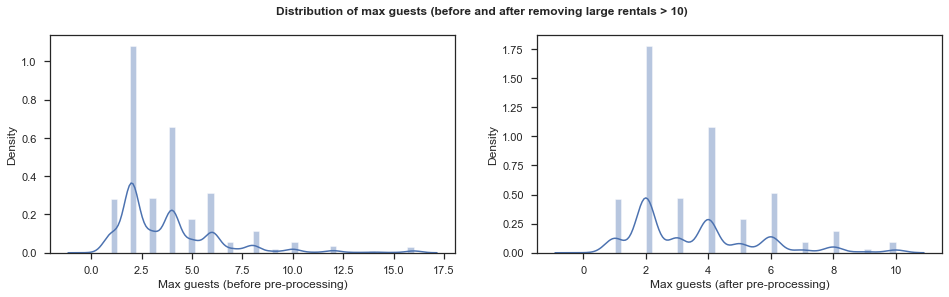

In [13]:
#Distribution of Size of rental
#The goal is to remove outliers from rentals for more than 10 guests that can skewed results
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of max guests (before and after removing large rentals > 10)', weight='bold', fontsize=12)

# Before pre-processing
x_axis=df['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (before pre-processing)'), ax=axs[0])

# Remove where price > 1000
condition = df[df['accommodates'] > 10]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After pre-processing
x_axis=df['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Max guests (after pre-processing)'), ax=axs[1])

You dropped 78 rows.
Dataset has 14015 rows, 15 columns.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price  (after pre-processing)', ylabel='Density'>

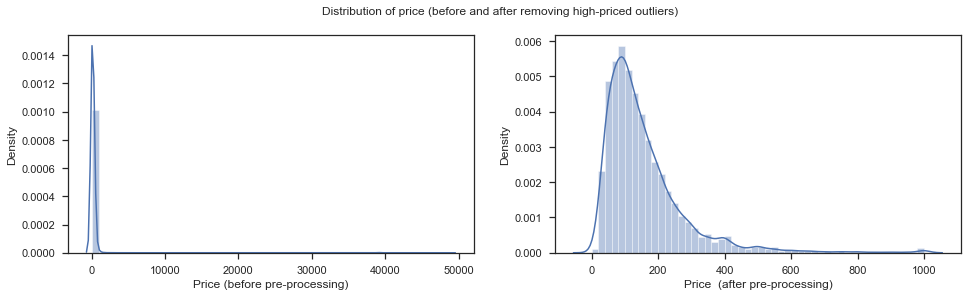

In [14]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of price (before and after removing high-priced outliers)')

# Before pre-processing
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price (before pre-processing)'), ax=axs[0])

# Remove where price > 1000
condition = df[df['price'] > 1000]
rows_to_drop = condition.index
print("You dropped {} rows.".format(condition.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After pre-processing
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Price  (after pre-processing)'), ax=axs[1])


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dataset has 5911 rows, 15 columns.
Dataset has 5911 rows, 14 columns.


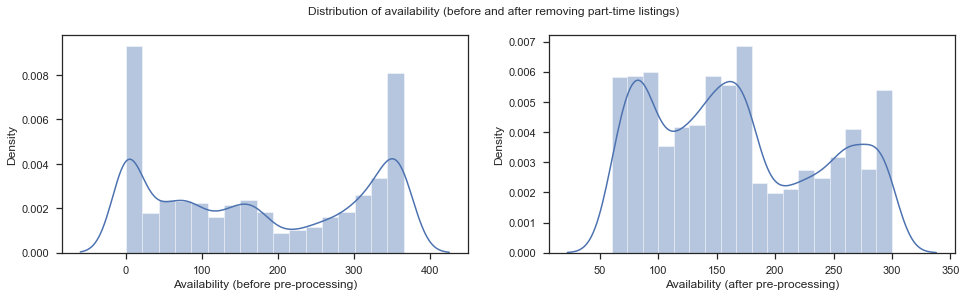

In [15]:
#Distribution of availability of rental in a calendar year
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of availability (before and after removing part-time listings)')

# Before pre-processing
x_axis=df['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (before pre-processing)'), ax=axs[0])

# Remove where availability less than 60 days or greater than 300 days
df = df.query('60 <= availability_365 <= 300')
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After pre-processing
x_axis=df['availability_365'].dropna()
sns.distplot(pd.Series(x_axis, name='Availability (after pre-processing)'), ax=axs[1])
df = df.drop('availability_365', axis = 1)
print("Dataset has {} rows, {} columns.".format(*df.shape))

In [16]:
#Check shape of dataset after removing outliers
df.shape

(5911, 14)

I have now removed the outliers from 3 key numeric variables: price, accomodates & availability_365.

In [17]:
#Look into property_type counts as it has too many possible values
df['property_type'].value_counts()

Entire rental unit                     2201
Entire condominium (condo)              661
Private room in residential home        567
Entire residential home                 539
Private room in rental unit             522
Entire guest suite                      370
Entire townhouse                        200
Private room in condominium (condo)     126
Entire guesthouse                       119
Entire loft                              96
Entire serviced apartment                95
Private room in townhouse                83
Room in boutique hotel                   78
Entire bungalow                          34
Room in hotel                            28
Private room in bungalow                 25
Shared room in rental unit               25
Private room in guest suite              23
Private room in loft                     21
Private room in bed and breakfast        20
Entire cottage                            7
Tiny house                                7
Private room in hostel          

In [18]:
#Bin under 'Other' all property types with less than 100 occurrences in the dataset 
categories_to_rename = ['Entire serviced apartment','Entire loft','Room in boutique hotel','Entire townhouse', 'Lighthouse', 'Private room in farm stay',
                        'Private room in townhouse', 'property_type_Camper/RV', 'Room in hotel', 'Shared room in rental unit', 'Entire guesthouse', 'Houseboat',
                        'Entire guesthouse', 'Private room in loft', 'Private room in bungalow', 'Private room in castle',
                        'Private room in bed and breakfast', 'Private room in guest suite', 'Boat', 'Entire loft', 'Private room in cottage', 
                        'Shared room in residential home', 'Private room in hostel', 'Entire bungalow', 'Entire serviced apartment',
                        'Private room in cottage', 'Private room in guesthouse', 'Room in aparthotel', 'Entire cottage', 
                        'Private room in villa', 'Houseboat', 'Entire villa', 'Tiny house', 'Private room in serviced apartment',
                        'Shared room in hostel', 'Private room in farm stay', 'Private room in cabin', 'Entire bed and breakfast',
                        'Shared room in bed and breakfast', 'Private room in tiny house', 'Barn', 'property_type_Camper/RV', 'Castle' ]
df['property_type'].loc[df['property_type'].isin(categories_to_rename)] = 'Other'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


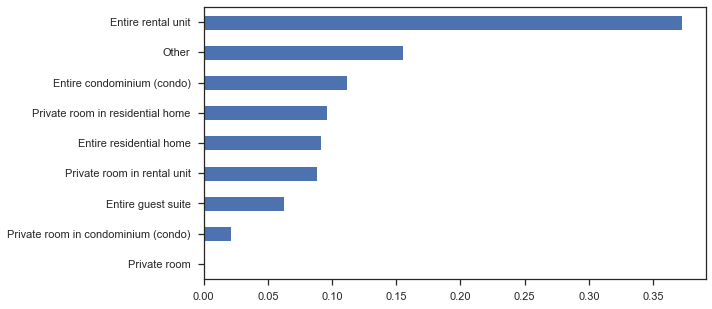

In [19]:
ax = df.property_type.value_counts(normalize=True).head(9).sort_values().plot(kind='barh', figsize=(9,5));

Over 40% of rentals are Entire units, suggesting that owners have dedicated properties for Airbnb reservations or give up their own units for renting purposes.

In [20]:
#Similar exercise with Amenities
df['amenities'].value_counts()

["Hot water", "Essentials", "Kitchen", "Gym", "Hangers", "Dishwasher", "Shampoo", "Elevator", "Heating", "Smoke alarm", "TV with standard cable", "Refrigerator", "Private entrance", "Oven", "Washer", "Paid parking on premises", "Carbon monoxide alarm", "Pool", "Long term stays allowed", "Microwave", "Cable TV", "Wifi", "Air conditioning", "Dryer", "Coffee maker", "Bed linens", "BBQ grill", "Bathtub", "Iron", "Lockbox", "Hair dryer"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   25
["Refrigerator", "Wifi", "Dryer", "Central air conditioning", 

In [21]:
#The Amenities list is far more extensive than property type. For analytical purposes, I will focus in only 
#3 key amenities: TV, AC and Wifi.
#Derive key amenities from list and turn them into categorical variables, then drop amenities
df['has_TV'] = df.amenities.apply(lambda s: int('TV' in str(s)[1:].split(','))).astype("category")
df['has_AC'] = df.amenities.apply(lambda s: int('Air conditioning' in str(s)[1:].split(','))).astype("category")

df['has_Wifi'] = df.amenities.apply(lambda s: int('Wifi' in str(s)[1:].split(','))).astype("category")
df['amenities_number'] = df.amenities.apply(lambda s: len(str(s)[1:].split(',')))
df = df.drop(columns = 'amenities')
df.head()

,description,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,host_acceptance_rate,city,reviews_per_month,latitude,longitude,has_TV,has_AC,has_Wifi,amenities_number
1,A very small studio in a wonderful neighborhoo...,Entire rental unit,Entire home/apt,2,1.0,1.0,65.0,2,NaN,chicago,3.34,41.90166,-87.68021,0,0,0,38
2,Beautiful first floor apartment in Historic Ol...,Entire rental unit,Entire home/apt,4,2.0,2.0,125.0,4,92.0,chicago,0.40,41.91196,-87.63981,0,0,0,33
4,Bed and Breakfast license issued by the City o...,Other,Private room,2,1.0,2.0,329.0,2,100.0,chicago,0.09,41.92357,-87.64947,0,0,0,22
9,Comfort and style. Recently named as one of th...,Private room in residential home,Private room,2,1.0,1.0,110.0,3,NaN,chicago,2.01,41.97303,-87.66567,0,0,0,37
10,Very close to all the Chicago action for both ...,Entire condominium (condo),Entire home/apt,4,1.0,2.0,79.0,2,NaN,chicago,0.31,41.84576,-87.61871,0,0,0,47


In [22]:
#In order to address the location criterion, I will create a variable that establishes how close
#a property is to the city centre, assuming that this is a positive signal.
#Calculate distance to city center to establish premium location
#Geographic coordinates for each city were taken from this website: https://dateandtime.info/citycoordinates.php?id=4930956
lat_center_dict = {'chicago': 41.8500300, 'cambridge': 42.3751000, 'boston': 42.3584300, 'denver':39.7391500}
lon_center_dict = {'chicago': -87.6500500, 'cambridge': -71.1056100, 'boston': -71.0597700, 'denver':-104.9847000}

In [23]:
df['lat_center'] = df.city.replace(lat_center_dict)
df['lon_center'] = df.city.replace(lon_center_dict)
df.head()

,description,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,host_acceptance_rate,city,reviews_per_month,latitude,longitude,has_TV,has_AC,has_Wifi,amenities_number,lat_center,lon_center
1,A very small studio in a wonderful neighborhoo...,Entire rental unit,Entire home/apt,2,1.0,1.0,65.0,2,NaN,chicago,3.34,41.90166,-87.68021,0,0,0,38,41.85003,-87.65005
2,Beautiful first floor apartment in Historic Ol...,Entire rental unit,Entire home/apt,4,2.0,2.0,125.0,4,92.0,chicago,0.40,41.91196,-87.63981,0,0,0,33,41.85003,-87.65005
4,Bed and Breakfast license issued by the City o...,Other,Private room,2,1.0,2.0,329.0,2,100.0,chicago,0.09,41.92357,-87.64947,0,0,0,22,41.85003,-87.65005
9,Comfort and style. Recently named as one of th...,Private room in residential home,Private room,2,1.0,1.0,110.0,3,NaN,chicago,2.01,41.97303,-87.66567,0,0,0,37,41.85003,-87.65005
10,Very close to all the Chicago action for both ...,Entire condominium (condo),Entire home/apt,4,1.0,2.0,79.0,2,NaN,chicago,0.31,41.84576,-87.61871,0,0,0,47,41.85003,-87.65005


In [24]:
%%time
# calculates distance of property to city center using Geopy https://geopy.readthedocs.io/en/stable/#module-geopy.distance
df['distance_center'] = df.apply(lambda x: distance.distance((x['latitude'], x['longitude']), (x['lat_center'], x['lon_center'])).km, axis = 1)

CPU times: user 1.22 s, sys: 4.95 ms, total: 1.22 s
Wall time: 1.22 s


In [25]:
#Drop latitude, longitude, lat_center & lon_center columns
df = df.drop(columns = ['latitude', 'longitude', 'lat_center', 'lon_center'])
df.head()

,description,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,host_acceptance_rate,city,reviews_per_month,has_TV,has_AC,has_Wifi,amenities_number,distance_center
1,A very small studio in a wonderful neighborhoo...,Entire rental unit,Entire home/apt,2,1.0,1.0,65.0,2,NaN,chicago,3.34,0,0,0,38,6.257290
2,Beautiful first floor apartment in Historic Ol...,Entire rental unit,Entire home/apt,4,2.0,2.0,125.0,4,92.0,chicago,0.40,0,0,0,33,6.930941
4,Bed and Breakfast license issued by the City o...,Other,Private room,2,1.0,2.0,329.0,2,100.0,chicago,0.09,0,0,0,22,8.168310
9,Comfort and style. Recently named as one of th...,Private room in residential home,Private room,2,1.0,1.0,110.0,3,NaN,chicago,2.01,0,0,0,37,13.723129
10,Very close to all the Chicago action for both ...,Entire condominium (condo),Entire home/apt,4,1.0,2.0,79.0,2,NaN,chicago,0.31,0,0,0,47,2.645575


Summary of data preparation:
These are the steps I took for pre-processing and feature engineering.
- eliminate outliers from the 3 key numeric variables such as price, accomodates and availability
- I binned property type to get only the most frequent types
- I identified the top 3 amenities and include an overall count of amenities available in the rental
- I derived a new variable 'distance_center' to account for close the rental unit is from main attractions in a city

Next I will move to engineer the target variable for my model.

<h2>Calculating Yield as target variable for model</h2>
Calculate yield using as guidance the San Francisco Model available at <a href= 'http://insideairbnb.com/about.html'>Inside Airbnb</a>.<br>
The given formula for Yield is: Average length of stay * Price * No. of reviews/month * Review Rate
I will use 2 variables to calculate Yield: 'Price' and 'Monthly Reviews' as proxies of possible gains derived from the $ amount gains from renting times the frequency of renting.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

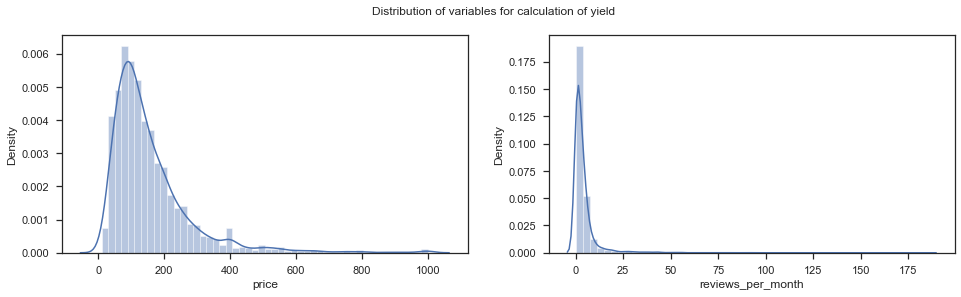

In [26]:
#Distribution of yield, reviews_per_month
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of variables for calculation of yield')
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[0])
x_axis=df['reviews_per_month'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[1])

In [27]:
#Get basic stats for all columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,5911.0,3.622399,2.058830,1.000000,2.000000,3.000000,5.000000,10.000000
bedrooms,5425.0,1.632995,0.858144,1.000000,1.000000,1.000000,2.000000,7.000000
beds,5818.0,1.899794,1.201725,0.000000,1.000000,2.000000,2.000000,12.000000
price,5911.0,156.506682,123.308211,11.000000,80.000000,123.000000,194.000000,1000.000000
minimum_nights,5911.0,16.868889,27.737076,1.000000,2.000000,3.000000,30.000000,365.000000
host_acceptance_rate,4988.0,87.294106,22.697705,0.000000,87.000000,97.000000,100.000000,100.000000
reviews_per_month,5040.0,3.904218,8.191664,0.020000,0.660000,2.070000,4.280000,185.380000
amenities_number,5911.0,32.487566,11.659327,1.000000,25.000000,32.000000,39.000000,78.000000
distance_center,5911.0,5.855662,4.430716,0.023885,2.380271,4.784746,8.009964,23.939544


In [28]:
# Calculate yield using as guidance the San Francisco Model available at http://insideairbnb.com/about.html
# The formula for Yield is: Average length of stay * Price * No. of reviews/month * Review Rate
# Avg length stay in US cities is around 3 nights according to the Budget and Legislative Analyst's Office
avg_length_of_stay_cities = 3
review_rate = 3.31
df['yield'] = avg_length_of_stay_cities * df['price'] * (df['reviews_per_month'] / review_rate) * 12

print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 5911 rows, 17 columns.


In [29]:
#Have a look at the newly created variable - The mean suggests a potential yield of US$6230 a year
df['yield'].describe()

count      5040.000000
mean       6408.640850
std       13818.241482
min           8.157100
25%         788.356495
50%        2724.797583
75%        6582.942598
max      223896.072508
Name: yield, dtype: float64

In [30]:
df.head()

,description,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,host_acceptance_rate,city,reviews_per_month,has_TV,has_AC,has_Wifi,amenities_number,distance_center,yield
1,A very small studio in a wonderful neighborhoo...,Entire rental unit,Entire home/apt,2,1.0,1.0,65.0,2,NaN,chicago,3.34,0,0,0,38,6.257290,2361.208459
2,Beautiful first floor apartment in Historic Ol...,Entire rental unit,Entire home/apt,4,2.0,2.0,125.0,4,92.0,chicago,0.40,0,0,0,33,6.930941,543.806647
4,Bed and Breakfast license issued by the City o...,Other,Private room,2,1.0,2.0,329.0,2,100.0,chicago,0.09,0,0,0,22,8.168310,322.042296
9,Comfort and style. Recently named as one of th...,Private room in residential home,Private room,2,1.0,1.0,110.0,3,NaN,chicago,2.01,0,0,0,37,13.723129,2404.712991
10,Very close to all the Chicago action for both ...,Entire condominium (condo),Entire home/apt,4,1.0,2.0,79.0,2,NaN,chicago,0.31,0,0,0,47,2.645575,266.356495


<h2>Text Cleaning and Mining of Rental Descriptions</h2>



In [31]:
#Define a class that removes special HTML characters, numbers, symbols, stopwords 
#and performs tokenization and lemmatization
class cleantext():
    
    def __init__(self, text = "test"):
        self.text = text
        
    def strip_html(self):
        soup = BeautifulSoup(self.text, "html.parser")
        self.text = soup.get_text()
        return self

    def remove_between_square_brackets(self):
        self.text = re.sub('\[[^]]*\]', '', self.text)
        return self

    def remove_numbers(self):
        self.text = re.sub('[-+]?[0-9]+', '', self.text)
        return self
    
    def remove_special_characters(self):
        self.text = re.sub('<br />', '', self.text)
        return self
  
    def get_words(self):
        self.words = nltk.word_tokenize(self.text)
        return self

    def to_lowercase(self):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = word.lower()
            new_words.append(new_word)
        self.words = new_words
        return self

    def remove_punctuation(self):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in self.words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        self.words = new_words
        return self

    def replace_numbers(self):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in self.words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        self.words = new_words
        return self

    def remove_stopwords(self):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in self.words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        self.words = new_words
        return self

    def stem_words(self):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in self.words:
            stem = stemmer.stem(word)
            stems.append(stem)
        self.words = stems
        return self

    def lemmatize_verbs(self):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in self.words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        self.words = lemmas
        return self
    
    def join_words(self):
        self.words = ' '.join(self.words)
        return self
    
    def do_all(self, text):
        
        self.text = text
        self = self.strip_html()
        self = self.remove_numbers()
        self = self.remove_special_characters()
        self = self.get_words()
        self = self.remove_punctuation()
        self = self.remove_stopwords()
        self = self.stem_words()
        self = self.lemmatize_verbs()
        self = self.join_words()
        
        return self.words

<>:14: DeprecationWarning: invalid escape sequence \[
<>:14: DeprecationWarning: invalid escape sequence \[
<>:14: DeprecationWarning: invalid escape sequence \[
<ipython-input-31-ed71e3b35ed8>:14: DeprecationWarning: invalid escape sequence \[
  self.text = re.sub('\[[^]]*\]', '', self.text)


In [32]:
#Initiates class
ct = cleantext(df)

In [33]:
%%time
#Apply to description column
df['cleaned_description'] = df['description'].apply(ct.do_all)

CPU times: user 1min 47s, sys: 30.9 s, total: 2min 18s
Wall time: 2min 19s


In [34]:
#Drop description and replace with cleaned_description
df = df.drop(columns = ['description'])
df.head()

,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,host_acceptance_rate,city,reviews_per_month,has_TV,has_AC,has_Wifi,amenities_number,distance_center,yield,cleaned_description
1,Entire rental unit,Entire home/apt,2,1.0,1.0,65.0,2,NaN,chicago,3.34,0,0,0,38,6.257290,2361.208459,a smal studio wond neighborhoodth spaceth smal...
2,Entire rental unit,Entire home/apt,4,2.0,2.0,125.0,4,92.0,chicago,0.40,0,0,0,33,6.930941,543.806647,beauty first flo apart hist old town treelin s...
4,Other,Private room,2,1.0,2.0,329.0,2,100.0,chicago,0.09,0,0,0,22,8.168310,322.042296,bed breakfast licens issu city chicago the spa...
9,Private room in residential home,Private room,2,1.0,1.0,110.0,3,NaN,chicago,2.01,0,0,0,37,13.723129,2404.712991,comfort styl rec nam on unbeliev airbnb chicag...
10,Entire condominium (condo),Entire home/apt,4,1.0,2.0,79.0,2,NaN,chicago,0.31,0,0,0,47,2.645575,266.356495,very clos chicago act busy pleas travel step a...


<h2>Topic Modelling for Descriptions</h2>
Since there is no existing Topic Directory for Airbnb reviews that I can use as starting point (similar to the Reuters news categories), I will create one based on descriptions using Latent Dirichlet Allocation (LDA). LDA follows a generative Bayesian inference model that associates the description with a probability distribution over topics. 
This will help me establish the topics I want to introduce to my model. I will use pyLDAvis package to visualize results.

In [35]:
#First I will have a quick look at the most frequent terms using WordCloud as part of my EDA
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

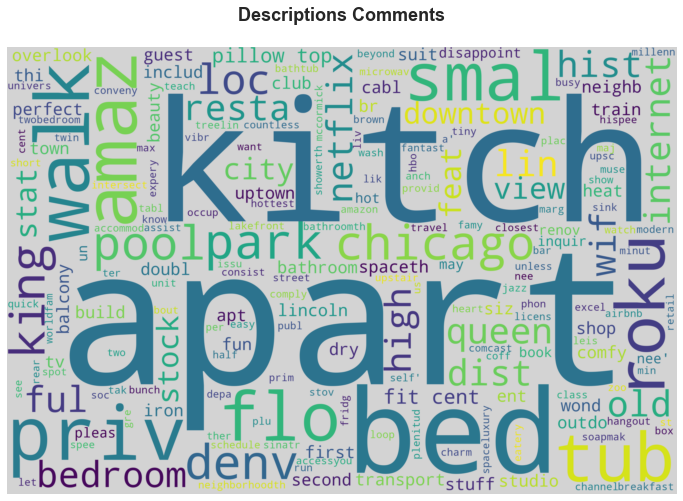

In [36]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df.cleaned_description.values))

plot_wordcloud(wordcloud, 'Descriptions')

In [37]:
nlp_feats = ['cleaned_description']
corpus = df[nlp_feats]
corpus.head()

,cleaned_description
1,a smal studio wond neighborhoodth spaceth smal...
2,beauty first flo apart hist old town treelin s...
4,bed breakfast licens issu city chicago the spa...
9,comfort styl rec nam on unbeliev airbnb chicag...
10,very clos chicago act busy pleas travel step a...


In [38]:
def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words or not t.isalpha()]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        word_tokens_no_stops_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in word_tokens_no_stops]
        processed_corpus.append(word_tokens_no_stops_lemmatized)
    return processed_corpus

In [39]:
def nlp_model_pipeline(processed_corpus):
    """Takes processed corpus and produce dictionary, doc_term_matrix and LDA model"""
    # Creates the term dictionary (every unique term in corpus is assigned an index)
    dictionary = Dictionary(processed_corpus)
    # Convert corpus into Document Term Matrix using dictionary prepared above
    doc_term_matrix = [dictionary.doc2bow(listing) for listing in processed_corpus]    
    return dictionary, doc_term_matrix

In [40]:
def LDA_topic_modelling(doc_term_matrix, dictionary, num_topics=3, passes=2):
    # Create an object for LDA model and train it on Document-Term-Matrix
    LDA = LdaModel
    ldamodel = LDA(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=passes)
    return ldamodel

In [41]:
def add_topics_to_df(ldamodel, doc_term_matrix, df, new_col, num_topics):
    '''This function stores the topics as defined by the LDA model 
    and will incorporate them as columns to the dataframe'''
    # Convert into Per-document topic probability matrix:
    docTopicProbMat = ldamodel[doc_term_matrix]
    docTopicProbDf = pd.DataFrame(index=df.index, dtype='float', columns=range(0, num_topics))
    for i, doc in enumerate(docTopicProbMat):
        for topic in doc:
            docTopicProbDf.loc[i, topic[0]] = topic[1]
    docTopicProbDf[new_col] = docTopicProbDf.idxmax(axis=1)
    df_topics = docTopicProbDf[new_col]
    # Merge with df
    df_new = pd.concat([df, df_topics], axis=1)
    return df_new

In [42]:
%%time
corpus_description = corpus['cleaned_description'].astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

CPU times: user 2.33 s, sys: 27 ms, total: 2.36 s
Wall time: 2.38 s


In [43]:
%%time
ldamodel_description = LDA_topic_modelling(doc_term_matrix_description, dictionary_description, num_topics=3, passes=10)

CPU times: user 35.5 s, sys: 157 ms, total: 35.7 s
Wall time: 35.9 s


In [44]:
%%time
p = gensimvis.prepare(ldamodel_description, doc_term_matrix_description, dictionary_description)

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


CPU times: user 2.45 s, sys: 253 ms, total: 2.71 s
Wall time: 4.85 s


In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))
pyLDAvis.enable_notebook()
pyLDAvis.display(p)

Using these results, I will now build the top 3 Topics for description. The results can be followed by clicking on 'Next Topic' button.

<b>Topic 1 - Location, location, location:</b>
Almost half of tokens, terms that relate to location are present such as: walk (implying the value of walking distance when navigating a foreign city, hence the value of distance to center which I calculated earlier. Also park, minutes, street and access, suggest the importance of highlighting these terms in order to highlight for visitors how easy it is to move around the city from that rental unit.

<b>Topic 2 - The Importance of Amenities:</b>
For 33% of tokens, the presence of terms related to rental's facilities are also relevant. For example highlighting the type of room (top term), comfort, size of bed, Wifi and private bathroom. Airbnb rentals want to also compete with hotel offerings which normally would offer amenities such as gym, business center, etc. 

<b>Topic 3 - Luxury:</b>
Interestingly, I found out that 'Luxury' seems to be a recurrent topic as hosts are keen to highlight these amenities that can set them apart. Airbnb rentals are used for a short amount of time and therefore for guests it will add to their experience if they can make use of luxurious facilities highlighted by terms such as 'modern', 'relax', 'beauty' and 'entertain'.

I have now identified my top 3 topics that I will include in the regression model.

Next I will conduct the final data handling prior to running the model.


In [46]:
#Create a class for dealing with missing values both for numerical and categorical values

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [47]:
# Remove missing target [yield] values using Imputer library
df = df.dropna(subset=['yield'])

# Impute most frequent for categorical features
categorical_feats = df.select_dtypes(include=['object']).columns
df[categorical_feats] = DataFrameImputer().fit_transform(df[categorical_feats])

In [48]:
# Impute median for numerical features
num_feats = df.select_dtypes(include=[np.number]).columns
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df[num_feats] = imp.fit_transform(df[num_feats])

print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 5040 rows, 17 columns.


In [49]:
#Final check to see if there are any null values, if False means there are not.
df.isnull().values.any()

False

In [50]:
# Separate NLP features
nlp_feats = ['cleaned_description']
corpus = df[nlp_feats]
df = df.drop(nlp_feats, axis = 1)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 5040 rows, 16 columns.


In [51]:
#Dropping price and reviews as they are used for calculating Yield and therefore are correlated
cols_to_drop = ['price', 'reviews_per_month']
df_final_viz = df[cols_to_drop]
df = df.drop(cols_to_drop, axis = 1)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 5040 rows, 14 columns.


In [52]:
# Dummy encoding for property and room types
categorical_feats = ['property_type', 'room_type']
df = pd.get_dummies(df, columns=categorical_feats, drop_first=False)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 5040 rows, 29 columns.


In [53]:
#Check data types
df.dtypes

accommodates                                          float64
bedrooms                                              float64
beds                                                  float64
minimum_nights                                        float64
host_acceptance_rate                                  float64
city                                                   object
has_TV                                               category
has_AC                                               category
has_Wifi                                             category
amenities_number                                      float64
distance_center                                       float64
yield                                                 float64
property_type_Camper/RV                                 uint8
property_type_Entire condominium (condo)                uint8
property_type_Entire guest suite                        uint8
property_type_Entire home/apt                           uint8
property

In [54]:
#Transform uint8 columns into categorical
for col in ['property_type_Entire condominium (condo)', 'property_type_Entire guest suite',
        'property_type_Entire home/apt', 'property_type_Camper/RV',
        'property_type_Entire rental unit', 'property_type_Entire residential home',
        'property_type_Other', 'property_type_Private room', 
        'property_type_Private room in condominium (condo)', 'property_type_Private room in rental unit',
        'property_type_Private room in residential home', 'property_type_Room in bed and breakfast',
        'property_type_Room in serviced apartment', 'room_type_Entire home/apt','room_type_Hotel room',
        'room_type_Private room','room_type_Shared room']:
    df[col]=df[col].astype("category")

#Drop city as no longer needed
df = df.drop(columns = ['city'])    
df.head()

,accommodates,bedrooms,beds,minimum_nights,host_acceptance_rate,has_TV,has_AC,has_Wifi,amenities_number,distance_center,...,property_type_Private room,property_type_Private room in condominium (condo),property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Room in bed and breakfast,property_type_Room in serviced apartment,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
1,2.0,1.0,1.0,2.0,97.0,0,0,0,38.0,6.257290,...,0,0,0,0,0,0,1,0,0,0
2,4.0,2.0,2.0,4.0,92.0,0,0,0,33.0,6.930941,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1.0,2.0,2.0,100.0,0,0,0,22.0,8.168310,...,0,0,0,0,0,0,0,0,1,0
9,2.0,1.0,1.0,3.0,97.0,0,0,0,37.0,13.723129,...,0,0,0,1,0,0,0,0,1,0
10,4.0,1.0,2.0,2.0,97.0,0,0,0,47.0,2.645575,...,0,0,0,0,0,0,1,0,0,0


In [55]:
#Final check
df.dtypes

accommodates                                          float64
bedrooms                                              float64
beds                                                  float64
minimum_nights                                        float64
host_acceptance_rate                                  float64
has_TV                                               category
has_AC                                               category
has_Wifi                                             category
amenities_number                                      float64
distance_center                                       float64
yield                                                 float64
property_type_Camper/RV                              category
property_type_Entire condominium (condo)             category
property_type_Entire guest suite                     category
property_type_Entire home/apt                        category
property_type_Entire rental unit                     category
property

In [56]:
#Define target variable
target = 'yield'
X = df.drop(target, axis=1)
y = df[target]

In [57]:
# Train test split
#Setting aside 30% of dataset to testing
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [58]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

<h2>Establishing a baseline model</h2>
For the baseline model I will use a simple Linear Regression. The results from the model are simple and easy to interpretate. In its first iteration, I will leave out the LDA topics just to establish how much of an improvement topics will bring to the final model.

In [59]:
# Make predictions using the testing set
regr_y_pred = regr.predict(X_test)

# Printing mean squared error as is the selected evaluation metric
print("Mean squared error: %.2f" % mean_squared_error(y_test, regr_y_pred))


Mean squared error: 201233160.62


After training the model, the result is Mean Squared Error 201233160

In [60]:
#Trying Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [61]:
# Fit regression model
dt_regr = DecisionTreeRegressor(random_state=seed, max_depth=5)
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [62]:
# Make prediction
dt_y_pred = dt_regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, dt_y_pred))

Mean squared error: 245120002.24


The Decision Tree model had a slightly higher MSE, 2452120002, which is an improvement from Linear Regression, but not significant.

In [63]:
#Finally I will fit a RandomForest model, which is typically a more complex model
rf_regr = RandomForestRegressor(random_state=seed, bootstrap=True, criterion='mse', max_depth=25, 
                           max_features='auto', min_samples_split=4, n_estimators=150)

rf_regr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=25, min_samples_split=4,
                      n_estimators=150, random_state=42)

In [64]:
# Make prediction
rf_y_pred = rf_regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_y_pred))

Mean squared error: 201524609.50


The Random Forest Regressor model had a similar MSE, 201524609, to Linear Regression.
Now I will bring in the text mining element to the model to observe if there are any improvements. I will introduce the listings as topics, which are determined by the trained LDA model.

In [65]:
#Topics are then added in as a new feature.
df = add_topics_to_df(ldamodel_description, doc_term_matrix_description, df, new_col='topics_description', num_topics=3)

# Rename columns based on understanding of topics as described above
df['topics_description'].replace({0:'Location', 1:'Amenities', 2:'Luxury'},inplace=True)
df = pd.get_dummies(df, columns=['topics_description'], drop_first=False)

print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 8883 rows, 31 columns.


In [66]:
#Remove any NAs
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [67]:
df.shape

(5040, 31)

In [68]:
# Create response and target variable
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [69]:
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [70]:
# Make prediction on best performing model
dt_y_pred = dt_regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, dt_y_pred))

Mean squared error: 261631378.25


There is a significant improvement in performance once topics are introduced for Decision Tree.

I will conclude the refinement part of the project by tuning hyperparameters using GridSearchCV library.

In [71]:
#Tuning hyperparameters
param_grid = {"criterion": ["squared_error", "absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [72]:
%%time
dt_regr = DecisionTreeRegressor(random_state=seed, max_depth=5)
dt_regr.fit(X_train, y_train)

dt_cv = GridSearchCV(dt_regr, param_grid, cv=5)
dt_cv.fit(X_train, y_train)

CPU times: user 1min 56s, sys: 343 ms, total: 1min 56s
Wall time: 1min 57s


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [73]:
# Make final prediction
dt_y_pred = dt_cv.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, rf_y_pred))
# Best params
print("Refined Model Parameters: {}".format(dt_cv.best_params_))

Mean squared error: 201524609.50
Variance score: 0.09
Refined Model Parameters: {'criterion': 'squared_error', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


A further refinement showed a moderate improvement.

<h2>Conclusions:</h2>
Whilst adding text-based variables built with NLP, improved performance the final model did not result in a model that can predict yield values in a reliable way. The challenge was to work with unstructured language and I'm satisfied to have explored topic modelling. This proved useful to identify the main features that hosts want to highlight.

On reflection, I learnt from this project to use new topic modelling techniques like LDA and spent a significant amount of time cleaning and doing feature engineering. LDA provided with a more rigorous approach to language modelling compared to for example bag of words, which is a basic and standard technique in NLP. LDA assumes that each document (listings' descriptions in this example) consists of multiple topics and calculates the contribution of each topic to the document. LDA algorithm's function is to construct the hidden (‘latent’) layer between the distribution of topics with the distribution of words. 

In terms of visualizing results, I used an Intertopic Distance Map, which shows for each of the main 3 topics a sorted list for the most frequent words found in each topic, based on the probability distribution for each term. This helped me build the 3 main topics for the descriptions: Location, Amenities and Luxury. One possible improvement for this project would be to try different topic modeling techniques such as Gibbs Sampling Dirichlet Multinomial Mixture (GSDMM) or Short Text Topic Modeling (STTM), which seem to perform better with shorter texts such as reviews and listings. These models also seek to tweak the number of meaningful tokens in order to really zoom in with relevant topics.

A further improvement to this model would be to expand the data sample, perhaps from 4 cities to 10 to increase the sample size to at least 10K rows. Given the consistency of Airbnb's API hosted in the website Inside Airbnb this should be a relative easy task to do. Perhaps this could also be done as a time series task, seeking to observe how topic modelling has changed before and after the Covid-19 pandemic (in the descriptions I used there was a lot of references to being fully vaccinated).

Also dimension-reduction as in the case for property type and room type is also an important technique to consider. Perhaps I could have increased the required threshold for value counts to reduce the number of dimensions even further.

I'm satisfied to have used such a well-built and documented dataset such as Airbnb listings. The reviews are also available so that could also be a part of future projects.


<h2>References:</h2>
<li>Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.</li>
<li>VanderPlas, J. Python data science handbook: Essential tools for working with data. (California: O'Reilly Media, Inc., 2016), pp.382–90.</li>
<li>Bird, S., E. Klein and E. Loper Natural language processing with Python: analyzing text with the natural language toolkit. (2019). Chapter 6, pp.221-228.</li>
<li>En.wikipedia.org. 2022. Latent Dirichlet allocation - Wikipedia. [online] Available at: <a href="https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation">Article</a> [Accessed 21 December 2021].</li>
<li>Amrouche, M., 2021. Short Text Topic Modeling. [online] Medium. Available at: <https://towardsdatascience.com/short-text-topic-modeling-70e50a57c883> [Accessed 22 December 2021].</li>